In [15]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.datasets import make_classification
from timerun import time_code, time_func
import time
import matplotlib.pyplot as plt
import numpy as np
from multiprocessing import Pool
from parallel_methods import DSMethods

In [16]:
def plot_train_vs_test(train_scores, test_scores, points = {}, time = -1):
    if points != {}: plt.scatter(points.keys(), points.values(), marker='|', zorder = 3)
    plt.plot(train_scores.keys(), train_scores.values(), label = "Train", zorder = 2)
    plt.plot(test_scores.keys(), test_scores.values(), label = "Test", zorder = 1)
    plt.legend()
    plt.ylim([0.4,1.0])
    plt.axhline(0.5, color = "red", linewidth=1, linestyle="--")
    plt.show()

    maxarg = list(test_scores.keys())[np.argmax(list(test_scores.values()))]
    print("AT", maxarg, test_scores[maxarg], "WITH", len(points), "ITERATIONS IN", time, "SECONDS")

def mean_of_arrays(data):
    arr = {}
    for x in data[0]:
        arr[x] = np.mean([data[v][x] for v in data])
    return arr

In [17]:
n_features = 300
X, y = make_classification(n_samples = 8000, n_features = n_features, n_informative = 30, random_state=8)
X_train, X_test = np.split(X, [1000])
y_train, y_test = np.split(y, [1000])
data = DSMethods(n_features, X_train, y_train, X_test, y_test)

# Random Selection

In [18]:
@time_func
def RANDOM_SELECTION(CVal = 10):
    with Pool(6) as pool:
        scores = pool.map(data.randomSelection, [CVal]*10)
    
    train_scores = mean_of_arrays({i: x[0] for i, x in enumerate(scores)})
    test_scores  = mean_of_arrays({i: x[1] for i, x in enumerate(scores)})
    time         = np.mean([x[2] for x in scores])
    plot_train_vs_test(train_scores, test_scores)

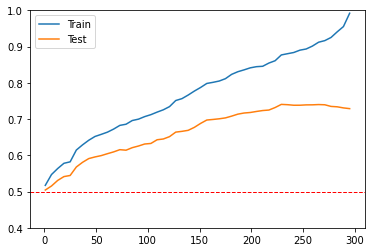

AT 229 0.7405285714285714 WITH 0 ITERATIONS IN -1 SECONDS
__main__.RANDOM_SELECTION - 00:00:31.784052100


In [19]:
RANDOM_SELECTION()

# SVM-RFE

In [20]:
@time_func
def SVM_RFE_NO_STEP():
    kf = KFold(n_splits=20, shuffle=True)

    index = [(test_index, train_index, 1) for test_index, train_index in kf.split(data.X_train)]
    with Pool(6) as pool:
        scores = pool.map(data.svm_rfe, index)

    #scores = list(map(data.svm_rfe, index))

    scores = list(scores)
    train_scores = mean_of_arrays({i: x[0] for i, x in enumerate(scores)})
    test_scores  = mean_of_arrays({i: x[1] for i, x in enumerate(scores)})
    points       = mean_of_arrays({i: x[2] for i, x in enumerate(scores)})
    time         = np.mean([x[3] for x in scores])

    plot_train_vs_test(train_scores, test_scores, {}, time)

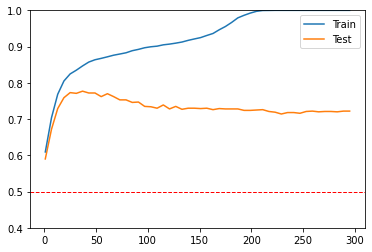

AT 37 0.7769999999999999 WITH 0 ITERATIONS IN 156.7226874113083 SECONDS
__main__.SVM_RFE_NO_STEP - 00:11:02.943540700


In [21]:
SVM_RFE_NO_STEP()

# SVM-RFE with Step


In [22]:
@time_func
def SVM_RFE_W_STEP(step):
    kf = KFold(n_splits=20, shuffle=True)

    index = [(test_index, train_index, step) for test_index, train_index in kf.split(data.X_train)]
    with Pool(7) as pool:
        scores = pool.map(data.svm_rfe, index)

    # scores = list(map(data.svm_rfe, index))
    scores = list(scores)

    train_scores = mean_of_arrays({i: x[0] for i, x in enumerate(scores)})
    test_scores  = mean_of_arrays({i: x[1] for i, x in enumerate(scores)})
    points       = mean_of_arrays({i: x[2] for i, x in enumerate(scores)})
    time         = np.mean([x[3] for x in scores])

    plot_train_vs_test(train_scores, test_scores, points, time)

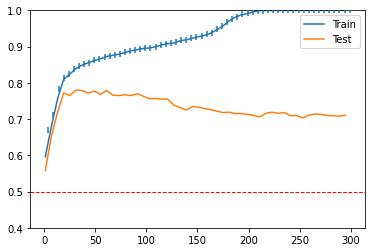

AT 31 0.78 WITH 60 ITERATIONS IN 29.16730155944824 SECONDS
__main__.SVM_RFE_W_STEP - 00:02:36.684932300


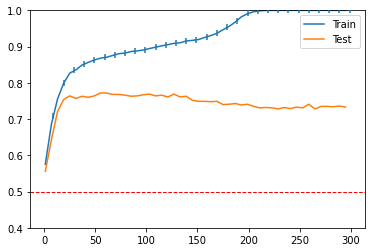

AT 55 0.772 WITH 30 ITERATIONS IN 15.901225018501282 SECONDS
__main__.SVM_RFE_W_STEP - 00:02:00.110473500


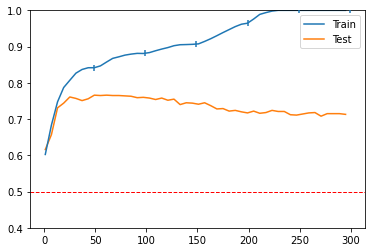

AT 61 0.7660000000000001 WITH 6 ITERATIONS IN 4.427823054790497 SECONDS
__main__.SVM_RFE_W_STEP - 00:01:29.435548400


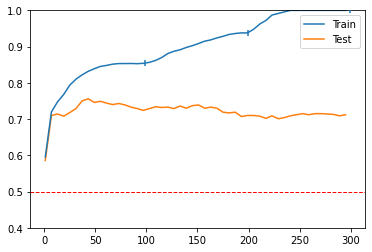

AT 43 0.756 WITH 3 ITERATIONS IN 2.7469507336616514 SECONDS
__main__.SVM_RFE_W_STEP - 00:01:22.515183000


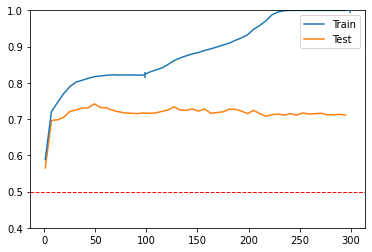

AT 49 0.742 WITH 2 ITERATIONS IN 2.6539514660835266 SECONDS
__main__.SVM_RFE_W_STEP - 00:01:22.008804700


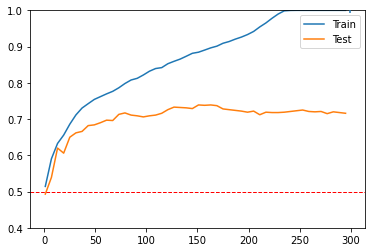

AT 151 0.7390000000000001 WITH 1 ITERATIONS IN 2.72924165725708 SECONDS
__main__.SVM_RFE_W_STEP - 00:01:18.898797500


In [23]:
#SVM_RFE_W_STEP(2)
SVM_RFE_W_STEP(5)
SVM_RFE_W_STEP(10)
SVM_RFE_W_STEP(50)
SVM_RFE_W_STEP(100)
SVM_RFE_W_STEP(200)
SVM_RFE_W_STEP(300)

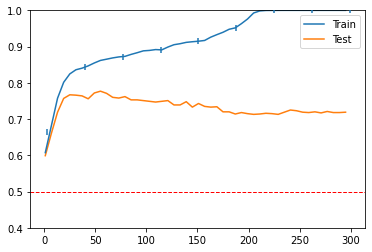

AT 55 0.7769999999999999 WITH 9 ITERATIONS IN 6.4125062227249146 SECONDS
__main__.SVM_RFE_W_STEP - 00:01:38.395664100


In [36]:
SVM_RFE_W_STEP(37)

# SVM-RFE with DynamicStep

In [25]:
@time_func
def SVM_RFE_W_DSTEP(percentage, stop = 1):
    kf = KFold(n_splits=20, shuffle=True)

    index = [(test_index, train_index, percentage, stop) for test_index, train_index in kf.split(data.X_train)]
    with Pool(7) as pool:
        scores = pool.map(data.svm_rfe_dynamic_step, index)
        scores = list(scores)

    # scores = list(map(data.svm_rfe, index))

    train_scores = mean_of_arrays({i: x[0] for i, x in enumerate(scores)})
    test_scores  = mean_of_arrays({i: x[1] for i, x in enumerate(scores)})
    points       = mean_of_arrays({i: x[2] for i, x in enumerate(scores)})
    time         = np.mean([x[3] for x in scores])

    plot_train_vs_test(train_scores, test_scores, points, time)

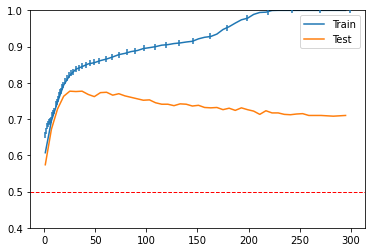

AT 37 0.7770000000000001 WITH 47 ITERATIONS IN 7.030328810214996 SECONDS
__main__.SVM_RFE_W_DSTEP - 00:01:29.777728800


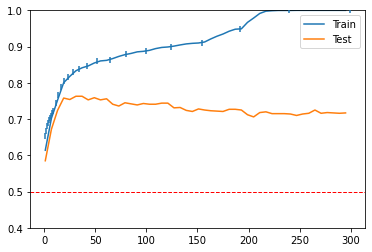

AT 37 0.763 WITH 26 ITERATIONS IN 3.834248995780945 SECONDS
__main__.SVM_RFE_W_DSTEP - 00:01:17.883637800


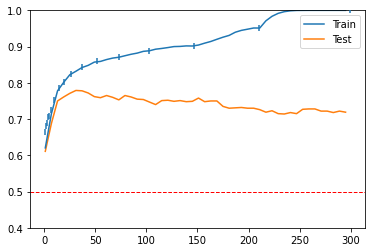

AT 31 0.779 WITH 17 ITERATIONS IN 2.817746472358704 SECONDS
__main__.SVM_RFE_W_DSTEP - 00:01:17.824402900


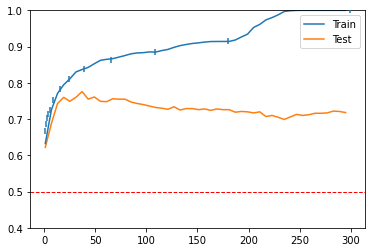

AT 37 0.776 WITH 13 ITERATIONS IN 2.6552123188972474 SECONDS
__main__.SVM_RFE_W_DSTEP - 00:01:20.998114600


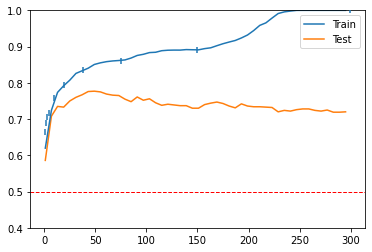

AT 49 0.777 WITH 10 ITERATIONS IN 2.594040036201477 SECONDS
__main__.SVM_RFE_W_DSTEP - 00:01:13.559619600


In [26]:
SVM_RFE_W_DSTEP(0.1)
SVM_RFE_W_DSTEP(0.2)
SVM_RFE_W_DSTEP(0.3)
SVM_RFE_W_DSTEP(0.4)
SVM_RFE_W_DSTEP(0.5)

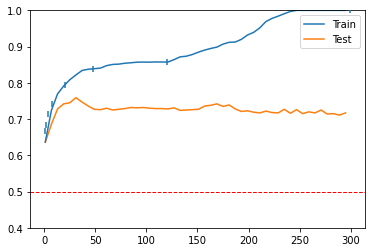

AT 31 0.759 WITH 8 ITERATIONS IN 2.5591920971870423 SECONDS
__main__.SVM_RFE_W_DSTEP - 00:01:13.054905300


In [35]:
SVM_RFE_W_DSTEP(0.6)

# SVM-RFE with DynamicStep based Plotting

In [29]:
@time_func
def SVM_RFE_W_DSTEP_PLOT(percentage, stop=1):
    kf = KFold(n_splits=20, shuffle=True)

    index = [(test_index, train_index, percentage, stop) for test_index, train_index in kf.split(data.X_train)]
    with Pool(7) as pool:
        scores = pool.map(data.svm_rfe_dynamic_step_only, index)
        scores= list(scores)

    # result = list(map(data.svm_rfe_dynamic_step_only, index))

    train_scores = mean_of_arrays({i: x[0] for i, x in enumerate(scores)})
    test_scores  = mean_of_arrays({i: x[1] for i, x in enumerate(scores)})
    points       = mean_of_arrays({i: x[2] for i, x in enumerate(scores)})
    time         = np.mean([x[3] for x in scores])

    plot_train_vs_test(train_scores, test_scores, points, time)

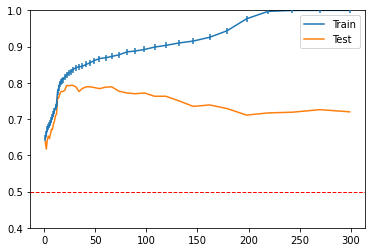

AT 28 0.793 WITH 47 ITERATIONS IN 6.768244695663452 SECONDS
__main__.SVM_RFE_W_DSTEP_PLOT - 00:00:23.798707700


In [28]:
SVM_RFE_W_DSTEP_PLOT(0.1)

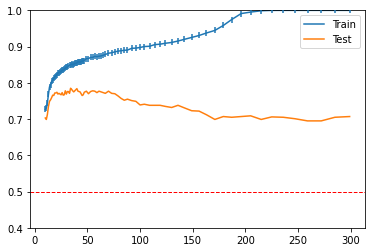

AT 34 0.7849999999999999 WITH 82 ITERATIONS IN 12.72249368429184 SECONDS
__main__.SVM_RFE_W_DSTEP_PLOT - 00:00:41.944010200


In [33]:
SVM_RFE_W_DSTEP_PLOT(0.05, 10)

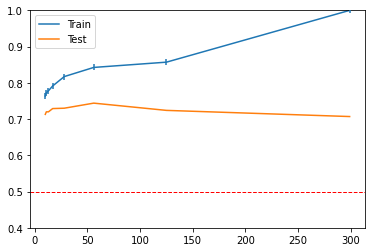

AT 56 0.744 WITH 8 ITERATIONS IN 2.3897446036338805 SECONDS
__main__.SVM_RFE_W_DSTEP_PLOT - 00:00:09.330555400


In [34]:
SVM_RFE_W_DSTEP_PLOT(0.6, 10)